<a href="https://colab.research.google.com/github/meifa00/BMCS2114_European_Soccer/blob/main/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling**

In [ ]:
# importing the necessary libraries
import pandas as pd
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# connecting the database
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/European Soccer/database.sqlite')
c = conn.cursor()

In [ ]:
# printing all the tables present in database.sqlite
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(list(row))

['sqlite_sequence']
['Player_Attributes']
['Player']
['Match']
['League']
['Country']
['Team']
['Team_Attributes']


In [ ]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
# read data into DataFrames from all the available tables
country_df = pd.read_sql("Select * from Country",conn)
league_df = pd.read_sql("Select * from League",conn)
match_df = pd.read_sql("Select * from Match",conn)
player_df = pd.read_sql("Select * from Player",conn)
player_attributes_df = pd.read_sql("Select * from Player_Attributes",conn)
team_df = pd.read_sql("Select * from Team",conn)
team_attributes_df = pd.read_sql("Select * from Team_Attributes",conn)

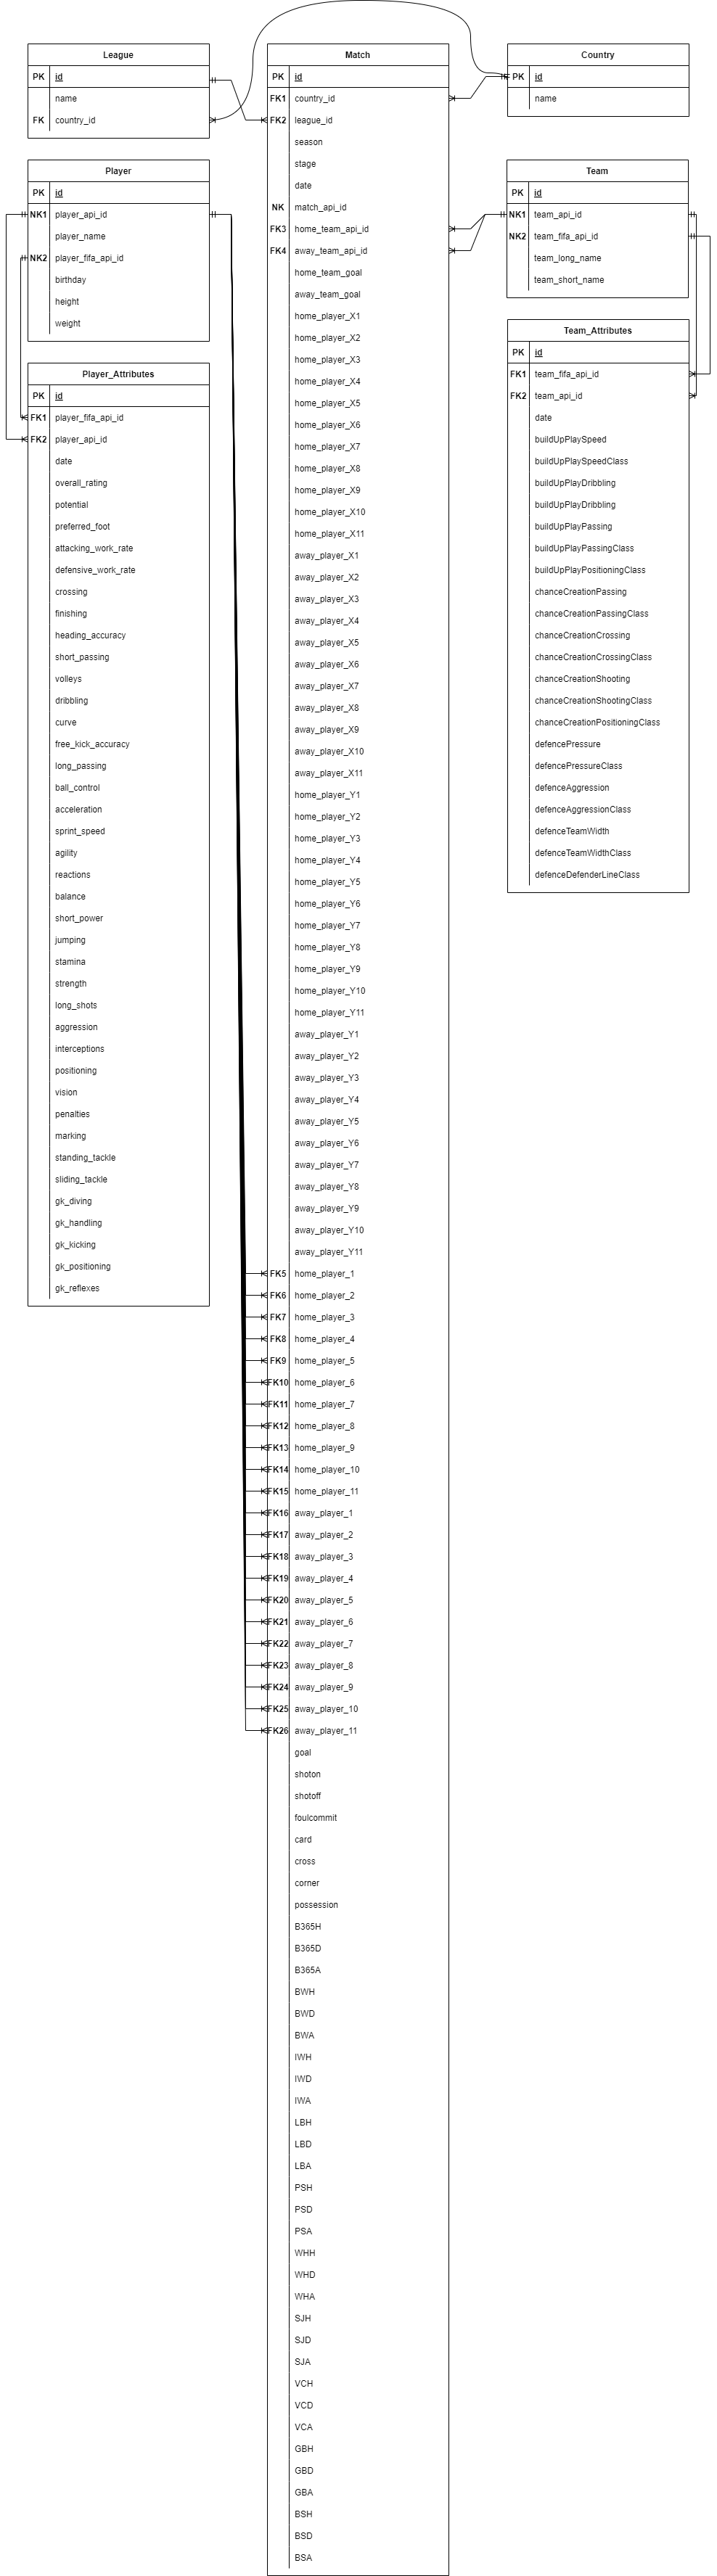

### **Country Table**

1. Print the first "n" rows of the "country_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
country_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


2. Print the last "n" rows of the "country_df" DataFrame.

In [ ]:
country_df.tail()

,id,name
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain
10,24558,Switzerland


3. Returns the size of the row and the size of the column in the "country_df" DataFrame.

In [ ]:
# view the shape of the table
country_df.shape

(11, 2)

The DataFrame 'country_df' has 11 rows and 2 columns.

4. Retrieve column labels for the "country_df" DataFrame.

In [ ]:
# return the column labels
country_df.columns

Index(['id', 'name'], dtype='object')

The DataFrame 'country_df' has two columns labeled 'id' and 'name'.

5. Obtain a succinct overview of the "country_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


DataFrame 'country_df' has 11 entries and 2 columns.

* Columns: id (int64) and name (object)
* Non-null entries: Both columns have 11 non-null entries
* Memory usage: Approximately 304.0 bytes

6. Find out the data type (dtype) of each column in the "country_df" DataFrame.

In [ ]:
# return the dtype of each column
country_df.dtypes

,0
id,int64
name,object


The data types for each column in DataFrame'country_df' are:
* id: int64
* name: object

7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "country_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
country_df.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


Here are the descriptive statistics for the 'id' column in DataFrame 'country_df':
* Count: 11
* Mean: 12452.09
* Standard Deviation: 8215.31
* Minimum: 1
* 25th Percentile (Q1): 6289
* Median (50th Percentile): 13274
* 75th Percentile (Q3): 18668
* Maximum: 24558

8. Find the count of duplicate entries in the "country_df" DataFrame.

In [ ]:
# look for any duplicated rows
country_df.duplicated().sum()

0

No duplicated rows in DataFrame 'country_df'.

9. Number of null values in "country_df" DataFrame.

In [ ]:
# check for null values
country_df.isnull().sum()

,0
id,0
name,0


DataFrame 'country_df' has no null values in either of its columns (id and name).

### **League Table**

1. Print the first "n" rows of the "league_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


2. Print the last "n" rows of the "league_df" DataFrame.

In [ ]:
league_df.tail()

,id,country_id,name
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA
10,24558,24558,Switzerland Super League


3. Returns the size of the row and the size of the column in the "league_df" DataFrame.

In [ ]:
# view the shape of the table
league_df.shape

(11, 3)

The DataFrame 'league_df' has 11 rows and 3 columns.

4. Retrieve column labels for the "league_df" DataFrame.

In [ ]:
# return the column labels
league_df.columns

Index(['id', 'country_id', 'name'], dtype='object')

DataFrame 'league_df' has three columns labeled 'id', 'country_id', and 'name'.

5. Obtain a succinct overview of the "league_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


DataFrame 'league_df' has 11 entries and 3 columns.

* Columns: id (int64), country_id (int64), and name (object)
* Non-null entries: All columns have 11 non-null entries
* Memory usage: Approximately 392.0 bytes

6. Find out the data type (dtype) of each column in the "league_df" DataFrame.

In [ ]:
# return the dtype of each column
league_df.dtypes

,0
id,int64
country_id,int64
name,object


The data types for each column in DataFrame 'league_df' are:
* id: int64
* country_id: int64
* name: object

7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "league_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
league_df.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000



Here are the descriptive statistics for the numeric columns in DataFrame 'league_df':
* 'id':
 * Count: 11
 * Mean: 12452.09
 * Standard Deviation: 8215.31
 * Minimum: 1
 * 25th Percentile (Q1): 6289
 * Median (50th Percentile): 13274
 * 75th Percentile (Q3): 18668
 * Maximum: 24558
* 'country_id':
 * Count: 11
 * Mean: 12452.09
 * Standard Deviation: 8215.31
 * Minimum: 1
 * 25th Percentile (Q1): 6289
 * Median (50th Percentile): 13274
 * 75th Percentile (Q3): 18668
 * Maximum: 24558

8. Find the count of duplicate entries in the "league_df" DataFrame.

In [ ]:
# look for any duplicated rows
league_df.duplicated().sum()

0

No duplicated rows in your DataFrame 'league_df'.

9. Number of null values in "league_df" DataFrame.

In [ ]:
# check for null values
league_df.isnull().sum()

,0
id,0
country_id,0
name,0


DataFrame 'league_df' has no null values in any of its columns (id, country_id, and name).

### **Match Table**

1. Print the first "n" rows of the "match_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


2. Print the last "n" rows of the "match_df" DataFrame.

In [ ]:
match_df.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Returns the size of the row and the size of the column in the "match_df" DataFrame.

In [ ]:
# view the shape of the table
match_df.shape

(25979, 115)

The DataFrame 'match_df' has 25979 rows and 115 columns.

4. Retrieve column labels for the "match_df" DataFrame.

In [ ]:
# return the column labels
match_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

DataFrame 'match_df' has 115 columns. Here are the first few and the last few column labels:

* First few columns: id, country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal
* Last few columns: SJA, VCH, VCD, VCA, GBH, GBD, GBA, BSH, BSD, BSA

5. Obtain a succinct overview of the "match_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


Your DataFrame 'match_df' has 25979 entries and 115 columns.

* Columns: 115, ranging from id to BSA
* Data types:
 * 96 columns of type float64
 * 9 columns of type int64
 * 10 columns of type object
* Memory usage: Approximately 22.8 MB

6. Find out the data type (dtype) of each column in the "match_df" DataFrame.

In [ ]:
# return the dtype of each column
match_df.dtypes

,0
id,int64
country_id,int64
league_id,int64
season,object
stage,int64
...,...
GBD,float64
GBA,float64
BSH,float64
BSD,float64


The data types for each column in your DataFrame 'match_df' are as follows:

* int64: id, country_id, league_id, stage, and a few others
* object: season and a few others
* float64: Most of the columns, including GBD, GBA, BSH, BSD, BSA, and many others

7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "match_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


8. Find the count of duplicate entries in the "match_df" DataFrame.

In [ ]:
# look for any duplicated rows
match_df.duplicated().sum()

0

No duplicated rows in your DataFrame 'match_df'.

9. Number of null values in "match_df" DataFrame.

In [ ]:
# check for null values
match_df.isnull().sum()

,0
id,0
country_id,0
league_id,0
season,0
stage,0
...,...
GBD,11817
GBA,11817
BSH,11818
BSD,11818


DataFrame 'match_df' has some columns with null values.

* id: 0
* country_id: 0
* league_id: 0
* season: 0
* stage: 0
* GBD: 11817
* GBA: 11817
* BSH: 11818
* BSD: 11818
* BSA: 11818

It seems that columns like GBD, GBA, BSH, BSD, and BSA have a significant number of null values.

### **Player Table**

1. Print the first "n" rows of the "player_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


2. Print the last "n" rows of the "player_df" DataFrame.

In [ ]:
player_df.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


3. Returns the size of the row and the size of the column in the "player_df" DataFrame.

In [ ]:
# view the shape of the table
player_df.shape

(11060, 7)

DataFrame 'player_df' has 11,060 rows and 7 columns.

4. Retrieve column labels for the "player_df" DataFrame.

In [ ]:
# return the column labels
player_df.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

The DataFrame 'player_df' has the following columns:
* id
* player_api_id
* player_name
* player_fifa_api_id
* birthday
* height
* weight

5. Obtain a succinct overview of the "player_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


DataFrame 'player_df' has 11,060 entries and 7 columns.

* Columns: id (int64), player_api_id (int64), player_name (object), player_fifa_api_id (int64), birthday (object), height (float64), and weight (int64)
* Non-null entries: All columns have 11,060 non-null entries
* Memory usage: Approximately 605.0 KB

6. Find out the data type (dtype) of each column in the "player_df" DataFrame.

In [ ]:
# return the dtype of each column
player_df.dtypes

,0
id,int64
player_api_id,int64
player_name,object
player_fifa_api_id,int64
birthday,object
height,float64
weight,int64


The data types for each column in DataFrame 'player_df' are:
* id: int64
* player_api_id: int64
* player_name: object
* player_fifa_api_id: int64
* birthday: object
* height: float64
* weight: int64


7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "player_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
player_df.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


8. Find the count of duplicate entries in the "player_df" DataFrame.

In [ ]:
# look for any duplicated rows
player_df.duplicated().sum()

0

No duplicated rows in your DataFrame 'player_df'.

9. Number of null values in "player_df" DataFrame.

In [ ]:
# check for null values
player_df.isnull().sum()

,0
id,0
player_api_id,0
player_name,0
player_fifa_api_id,0
birthday,0
height,0
weight,0


DataFrame 'player_df' has no null values in any of its columns (id, player_api_id, player_name, player_fifa_api_id, birthday, height, and weight).

### **Player Attributes Table**

1. Print the first "n" rows of the "player_attributes_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


2. Print the last "n" rows of the "player_attributes_df" DataFrame.

In [ ]:
player_attributes_df.tail()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


3. Returns the size of the row and the size of the column in the "player_attributes_df" DataFrame.

In [ ]:
# view the shape of the table
player_attributes_df.shape

(183978, 42)

DataFrame 'player_attributes_df' has 183978 rows and 42 columns.

4. Retrieve column labels for the "player_attributes_df" DataFrame.

In [ ]:
# return the column labels
player_attributes_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

The DataFrame 'player_attributes_df' has the following columns:
* id
* player_fifa_api_id
* player_api_id
* date
* overall_rating
* potential
* preferred_foot
* attacking_work_rate
* defensive_work_rate
* crossing
* finishing
* heading_accuracy
* short_passing
* volleys
* dribbling
* curve
* free_kick_accuracy
* long_passing
* ball_control
* acceleration
* sprint_speed
* agility
* reactions
* balance
* shot_power
* jumping
* stamina
* strength
* long_shots
* aggression
* interceptions
* positioning
* vision
* penalties
* marking
* standing_tackle
* sliding_tackle
* gk_diving
* gk_handling
* gk_kicking
* gk_positioning
* gk_reflexes

5. Obtain a succinct overview of the "player_attributes_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

6. Find out the data type (dtype) of each column in the "player_attributes_df" DataFrame.

In [ ]:
# return the dtype of each column
player_attributes_df.dtypes

,0
id,int64
player_fifa_api_id,int64
player_api_id,int64
date,object
overall_rating,float64
potential,float64
preferred_foot,object
attacking_work_rate,object
defensive_work_rate,object
crossing,float64


7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "player_attributes_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
player_attributes_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


8. Find the count of duplicate entries in the "player_attributes_df" DataFrame.

In [ ]:
# look for any duplicated rows
player_attributes_df.duplicated().sum()

0

No duplicated rows in DataFrame 'player_attributes_df'.

9. Number of null values in "player_attributes_df" DataFrame.

In [ ]:
# check for null values
player_attributes_df.isnull().sum()

,0
id,0
player_fifa_api_id,0
player_api_id,0
date,0
overall_rating,836
potential,836
preferred_foot,836
attacking_work_rate,3230
defensive_work_rate,836
crossing,836


### **Team Table**

1. Print the first "n" rows of the "team_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


2. Print the last "n" rows of the "team_df" DataFrame.

In [ ]:
team_df.tail()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU
298,51606,7896,NaN,Lugano,LUG


3. Returns the size of the row and the size of the column in the "team_df" DataFrame.

In [ ]:
# view the shape of the table
team_df.shape

(299, 5)

DataFrame 'team_df' has 299 rows and 5 columns.

4. Retrieve column labels for the "team_df" DataFrame.

In [ ]:
# return the column labels
team_df.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

The DataFrame 'team_df' has the following column labels:
* id
* team_api_id
* team_fifa_api_id
* team_long_name
* team_short_name

5. Obtain a succinct overview of the "team_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Here’s a concise summary of your DataFrame 'team_df':

* Total entries: 299
* Columns: 5
 * id: 299 non-null, int64
 * team_api_id: 299 non-null, int64
 * team_fifa_api_id: 288 non-null, float64
 * team_long_name: 299 non-null, object
 * team_short_name: 299 non-null, object
* Memory usage: 11.8 KB

6. Find out the data type (dtype) of each column in the "team_df" DataFrame.

In [ ]:
# return the dtype of each column
team_df.dtypes

,0
id,int64
team_api_id,int64
team_fifa_api_id,float64
team_long_name,object
team_short_name,object


Here are the data types for each column in DataFrame 'team_df':
* id: int64
* team_api_id: int64
* team_fifa_api_id: float64
* team_long_name: object
* team_short_name: object

7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "team_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
team_df.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


8. Find the count of duplicate entries in the "team_df" DataFrame.

In [ ]:
# look for any duplicated rows
team_df.duplicated().sum()

0

No duplicated rows in DataFrame 'team_df'.

9. Number of null values in "team_df" DataFrame.

In [ ]:
# check for null values
team_df.isnull().sum()

,0
id,0
team_api_id,0
team_fifa_api_id,11
team_long_name,0
team_short_name,0


DataFrame 'team_df' has some missing values in the 'team_fifa_api_id' column.

* id: 0 null values
* team_api_id: 0 null values
* team_fifa_api_id: 11 null values
* team_long_name: 0 null values
* team_short_name: 0 null values

### **Team Attributes Table**

1. Print the first "n" rows of the "team_attributes_df" DataFrame.

In [ ]:
# look at the initial data of the DataFrame
team_attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


2. Print the last "n" rows of the "team_attributes_df" DataFrame.

In [ ]:
team_attributes_df.tail()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1457,1458,15005,10000,2015-09-10 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


3. Returns the size of the row and the size of the column in the "team_attributes_df" DataFrame.

In [ ]:
# view the shape of the table
team_attributes_df.shape

(1458, 25)

DataFrame 'team_attributes_df' has 1458 rows and 25 columns.

4. Retrieve column labels for the "team_attributes_df" DataFrame.

In [ ]:
# return the column labels
team_attributes_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

5. Obtain a succinct overview of the "team_attributes_df" DataFrame’s structure and content, including the number of rows and columns, total memory use, the data type of each column, and the count of non-NaN components.

In [ ]:
# summary of the DataFrame
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

6. Find out the data type (dtype) of each column in the "team_attributes_df" DataFrame.

In [ ]:
# return the dtype of each column
team_attributes_df.dtypes

,0
id,int64
team_fifa_api_id,int64
team_api_id,int64
date,object
buildUpPlaySpeed,int64
buildUpPlaySpeedClass,object
buildUpPlayDribbling,float64
buildUpPlayDribblingClass,object
buildUpPlayPassing,int64
buildUpPlayPassingClass,object


7. View some basic statistical characteristics like mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the "team_attributes_df" DataFrame or a series of numeric numbers.

In [ ]:
# calculate descriptive statistics for each numeric column
team_attributes_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


8. Find the count of duplicate entries in the "team_attributes_df" DataFrame.

In [ ]:
# look for any duplicated rows
team_attributes_df.duplicated().sum()

0

No duplicated rows in DataFrame 'team_attributes_df'.

9. Number of null values in "team_attributes_df" DataFrame.

In [ ]:
# check for null values
team_attributes_df.isnull().sum()

,0
id,0
team_fifa_api_id,0
team_api_id,0
date,0
buildUpPlaySpeed,0
buildUpPlaySpeedClass,0
buildUpPlayDribbling,969
buildUpPlayDribblingClass,0
buildUpPlayPassing,0
buildUpPlayPassingClass,0


DataFrame 'team_attributes_df' has missing values in the buildUpPlayDribbling column.

* id: 0 null values
* team_fifa_api_id: 0 null values
* team_api_id: 0 null values
* date: 0 null values
* buildUpPlaySpeed: 0 null values
* buildUpPlaySpeedClass: 0 null values
* buildUpPlayDribbling: 969 null values
* All other columns: 0 null values